# Лабораторная работа № 3. Статистический анализ данных и построение графиков

В работе проводится обзор основных возможностей модулей **numpy** и **pandas** для статистического анализа данных, а также их визуализации с помощью модуля **matplotlib**. 

## Цель работы

Изучить основные возможности модулей **matplotlib** и **pandas** по визуальному представлению данных. Получить навык статистической обработки данных средствами модуля **pandas**.

## Модуль matplotlib

Модуль **matplotlib** является довольно мощным средством пострения различного рода графиков. Подчас работа с ним вызывает некоторые затруднения, которые вызваны некоторыми аспектами. Этот модуль действительно обширен, **matplotlib** содержит несколько разных интерфейсов (способов построения фигуры) и может взаимодействовать с большим количеством бекендов (бекенды отвечают за то, как по факту будут отображаться диаграммы, не только за внутреннюю структуру). К тому же часть собственной документации **matplotlib** серьезно устарела. Однако понимание того, как работает этот модуль позволит избежать большинства возникающих затруднений.

Всю документацию по этому модулю и примеры его использования можно найти на [официальном сайте.](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib.org")

Импортируем модуль с помощью команды **import**. Стандартное краткое обозначение - **plt**

In [289]:
import matplotlib.pyplot as plt

Следующая магическая команда (она именно так называется!) устанавливает определенный бекенд: *inline* означает, что графики будут строится непосредственно после самого кода, т.е. будут включаться в структуру кода, а *notebook* означает, что графики будут рисоваться отдельно от того кода, который их вызвал. Это может быть полезно, например, для динамического обновления графика.

In [290]:
# %matplotlib notebook 
%matplotlib inline

**Matplotlib** основывается на иерархии объектов. Объект **Figure** – это внешний контейнер для графики, который может включать в себя несколько объектов **Axes**. Причиной сложности в понимании может быть название: **Axes** (оси), на самом деле, представляют собой то, что мы подразумеваем под индивидуальным графиком или диаграммой.

Можно рассматривать объект **Figure** как контейнер, содержащий один или несколько объектов **Axes** (настоящих графиков). Под объектами **Axes**, в порядке иерархии расположены меньшие объекты, такие как индивидуальные линии, отметки, легенды и текстовые боксы. Практически каждый «элемент» диаграммы – это собственный манипулируемый объект Python, вплоть до ярлыков и отметок.

![Figure object](https://python-scripts.com/wp-content/uploads/2018/03/figure-matplotlib.jpg "Figure object")

Для создания объекта **Figure** используется функция **subplots(figsize)**, на вход которой подается размер окна в виде объекта **tuple**. Возвращаемое значение - объект **Figure** и объекты **Axes**, находящиеся внутри объекта **Figure**.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._axes.Axes'>


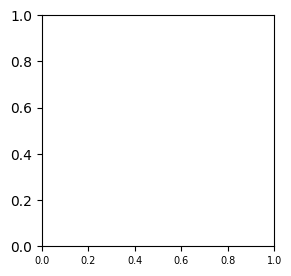

In [291]:
fig, ax = plt.subplots(figsize=(3,3))
print(type(fig))
print(type(ax))

Важно отметить, что есть два интерфейса работы с модулем **matplotlib**: структурированный (ориентированный на структуру) и неструктурированный (ориентированный на объект). Пример выше - структурированный подход. В этом подходе все команды стоит приписывать определенному объекту **Axes**, вызвать который можно с помощью команды **gca()** (get current axes). Пример ниже иллюстрирует, каким образом в рамках структурированного подхода можно построить простой график.

Обратите внимание, что график построился в окошке выше, к которому привязался объект **Axes**.

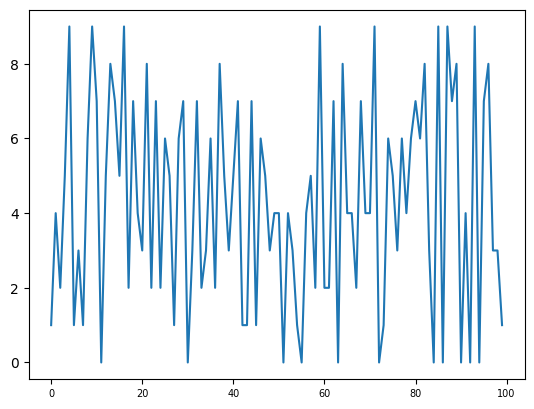

In [292]:
import numpy as np

ax = plt.gca()
ax.plot(np.arange(100), np.random.randint(0, 10, size=100))

Другим подходом является неструктурированный подход. Он проще в использовании, и дальнейшем мы будем пользоваться им. В рамках этого подхода текущий объект **Axes** всегда негласно подразумевается. При функции, которая создает новый объект **Axes**, фокус внимания смещается на него. Пример ниже иллюстрирует построение простого графика в рамках неструктурированного (объектно-ориентированного) подхода.

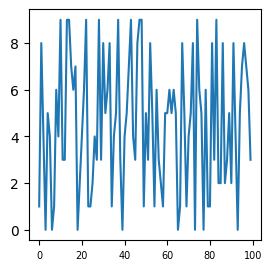

In [293]:
plt.figure(figsize = (3,3))
plt.plot(np.arange(100), np.random.randint(0, 10, size=100))
plt.show()

### Линейный график

Построить линейный график можно с помощью метода **plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=12, label='line1')**. Здесь *x* - массив значений по горизонтальной оси, *y* - массив значений по вертикальной оси, *color* - цвет линии, *marker* - отображение точек ('0' - круги, 'x' - кресты и др.), *linestyle* - тип рисуемой линии (сплошная, штриховая, точечная и др.), *linewidth* - ширина линии, *markersize* - размер точек, *label* - название линии. Есть еще много других параметров, о них можно прочитать в документации.

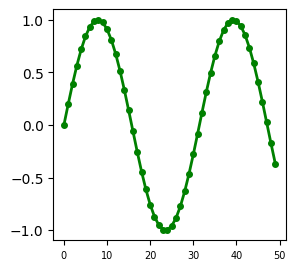

In [294]:
plt.figure(figsize = (3,3))
x = np.arange(50)
y = np.sin(x / 5)
plt.plot(x, y, color='green', marker='o', linestyle='solid', linewidth=2, markersize=4, label='line1')
# y = np.sin(x / 5 - 1)
# plt.plot(x, y)
plt.show()

Вызов еще одной такой же функции добавляет новую кривую на тот же график. Если параметры прорисовки линий не указывать, то они устанавливаются по умолчанию.

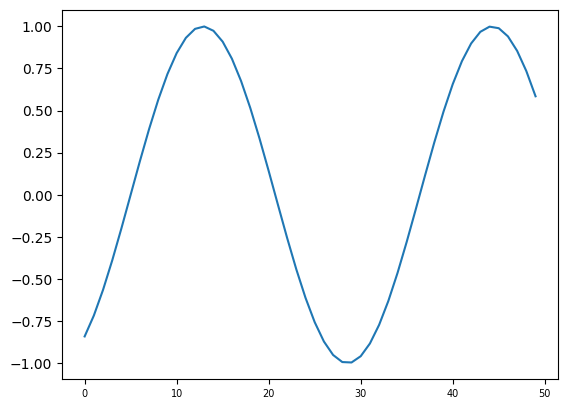

In [295]:
y = np.sin(x / 5 - 1)
plt.plot(x, y)

Функция **title()** устанавливает название графика, функции **xlabel()**, **ylabel()** устанавливают названия осей, функции **xlim()**, **ylim()** - диапазоны осей, **xscale()**, **yscale()** - масштабы осей (линейный, логарифмический). Функция **legend()** размещает легенду к графику в определенном место (за это отвечает параметр *loc*).

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


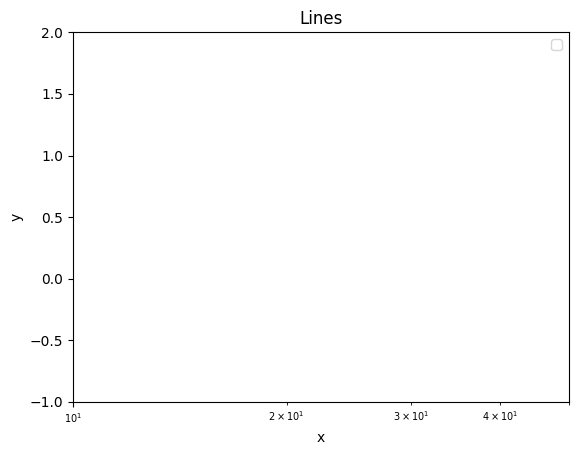

In [296]:
plt.title('Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(10, 50)
plt.ylim(-1, 2)
plt.xscale('log')
plt.legend(loc='best')

### Точечный график

Для построения точечного графика используется функция **plt.scatter(x, y, s=3, c='green', marker='+', cmap, alpha=0.5, label='scatter')**. Аргументы этой функции схожи с аргументами функции **plt.plot()**, но есть отличия. Параметр *s* задает размер маркера, *c* задает цвет, *cmap* обозначает цветовую палитру, в которую в зависимости от значения будут раскрашены точки, *alpha* задает степень прозрачности маркера (1 - непрозрачный, 0 - прозрачный).

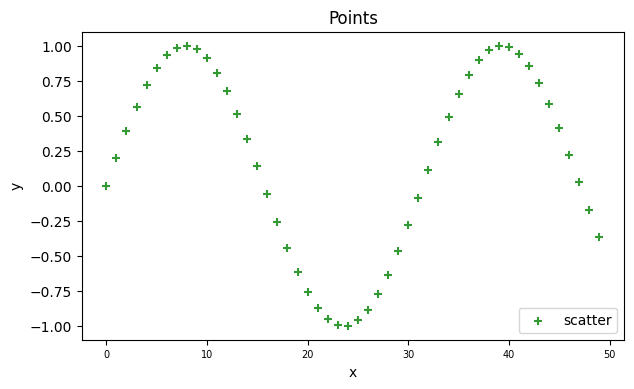

In [297]:
plt.figure(figsize = (7,4))
x = np.arange(50)
y = np.sin(x / 5)
plt.scatter(x, y, s=30, c='green', marker='+', alpha=0.8, label='scatter')
plt.title('Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='lower right')
plt.show()

### Несколько графиков в одном окне

Предположим, нам надо сравнить несколько различных графиков друг с другом, т.е. расположить их рядом или сгруппировать несколько графиков, чтобы они отображались в одном окне. В этом случае объекту **Figure** будут принадлежать сразу несколько объектов **Axes**. Построить такие графики можно с помощью функции **plt.subplot(nrows, ncol, num)**, *nrows* равен числу колонок в таблице из графиков, *ncol* равен числу столбцов в таблице из графиков, *num* обозначает порядковый номер графика. При этом после выполнения команды **plt.subplot()** "фокус" смещается на текущий график, и все команды, связанные с отображением данных, построения самого графика, оформления его внешнего вида, исполняются для текущего объекта **Axes**. Новая команда **plt.subplot()** с другим *num* делает активным уже другой объект **Axes**.

В примере ниже построим две кривые на соседних графиках.

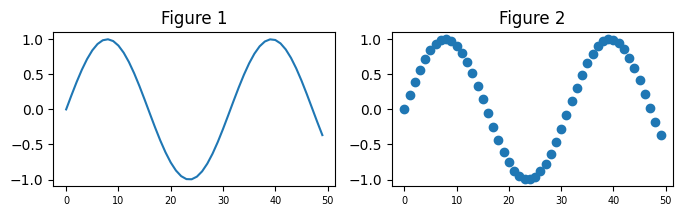

In [298]:
plt.figure(figsize = (8,2))
plt.subplot(1,2,1)
plt.title('Figure 1')
plt.plot(x, y)
plt.subplot(1,2,2)
plt.title('Figure 2')
plt.scatter(x, y)
plt.show()

### Гистограммы

Гистограммы строятся с помощью функции **plt.hist(x, bins, range=(xmin, xmax), histtype, align, orientation, color, label)**. Аргумент *x* содержит последовательность значений, по которым будет строится гистограмма, *range* определяет, в каких интервалах будут выбираться значения, *bins* равен числу столбцов в гистограмме, *color* задает цвета, *label* определеяет метки данных (названия колонок). 

Параметр *histtype* определяет тип гистограммы: *bar* - традиционная гистограмма в виде колонок/столбцов (если данные многомерные, то каждая колонка будет содержать колонки под каждую размерность), *barstacked* - в случае многомерных данных колонки будут друг над другом, *step* - отображается огибающая, *stepfilled* - отображается огибающая с заполнением.

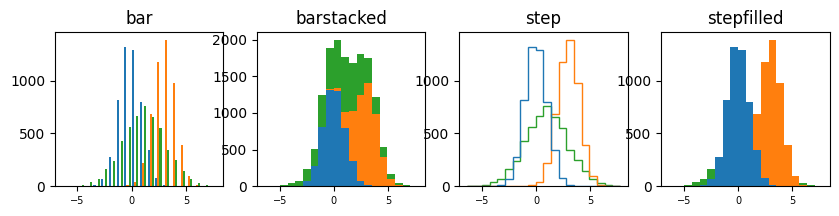

In [299]:
x1 = np.random.normal(loc=0, scale=1, size=5000)
x2 = np.random.normal(loc=3, scale=1, size=5000)
x3 = np.random.normal(loc=1, scale=2, size=5000)

plt.figure(figsize = (10,2))
plt.subplot(1,4,1)
plt.title('bar')
plt.hist([x1,x2,x3], bins=20, histtype='bar', align='mid', orientation='vertical')
plt.subplot(1,4,2)
plt.title('barstacked')
plt.hist([x1,x2,x3], bins=20, histtype='barstacked', align='mid', orientation='vertical')
plt.subplot(1,4,3)
plt.title('step')
plt.hist([x1,x2,x3], bins=20, histtype='step', align='mid', orientation='vertical')
plt.subplot(1,4,4)
plt.title('stepfilled')
plt.hist([x1,x2,x3], bins=20, histtype='stepfilled', align='mid', orientation='vertical')
plt.show()

Параметр *align* определяет выравнивание баров относительно колонок. Возможные значения: *left*, *mid*, *right*.

Параметр *orientation* принимает возможные значения *horizontal* и *vertical* и определяет пространственную ориентацию колонок.

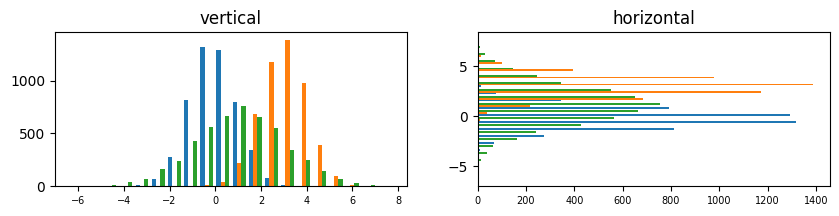

In [300]:
plt.figure(figsize = (10,2))
plt.subplot(1,2,1)
plt.title('vertical')
plt.hist([x1,x2,x3], bins=20, orientation='vertical')
plt.subplot(1,2,2)
plt.title('horizontal')
plt.hist([x1,x2,x3], bins=20, orientation='horizontal')
plt.show()

## Статистический анализ средствами модуля **pandas**

В первой лабораторной работе уже упоминался метод **describe()** классов **Series** и **DataFrame**, позволяющий получать основные статистические величины (среднее значение, стандартное отклонение, медиану и пр.) по каждой из колонок таблицы. Но иногда требуется получить какие-то другие статистические величины, только на части данных, удовлетворяющих определенному условию. Для этого можно использовать непосредственно статистические функции, являющиеся методами этих классов: *max()*, *min()*, *mode()*, *kurt()*, *median()*, *quantile()*, *skew()*, *std()*, *var()*, *diff()*, *corr()*, *autocorr()* и др. Полный список можно найти на [сайте с документацией](https://pandas.pydata.org/docs/reference/frame.html "dataframe").

Для примера создадим объект **DataFrame** c 10 колонками и заполним их равномерно распределенными значениями в интервале \[0, 1\].

In [301]:
import pandas as pd

df = pd.DataFrame(data=np.array([np.random.uniform(size=1000) for i in range(10)]).T, columns=['Var'+str(i) for i in range(10)])
df.head()

,Var0,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var8,Var9
0,0.153532,0.522505,0.096411,0.664956,0.595509,0.567236,0.322924,0.560321,0.032469,0.998902
1,0.874549,0.513896,0.506319,0.334411,0.073113,0.944514,0.852954,0.473078,0.929254,0.562300
2,0.224892,0.519961,0.335336,0.609700,0.999910,0.910173,0.450437,0.603741,0.924473,0.110882
3,0.925769,0.179514,0.455405,0.183565,0.514890,0.632399,0.279185,0.649700,0.342136,0.812292
4,0.202570,0.929703,0.150083,0.497384,0.280107,0.581719,0.656353,0.966699,0.265474,0.794373


**DataFrame** имеет встроенные методы для построения графиков. Например, построим точечный график для значений первой колонки по значениям нулевой колонки с помощью метода **plot.scatter()**. Его аргументы аналогичны функции **plt.scatter()**.

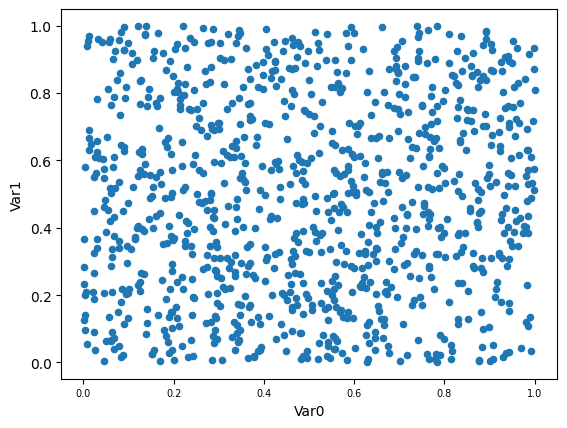

In [302]:
df.plot.scatter('Var0', 'Var1')
plt.show()

С помощью метода **plot.hist()** определим распределение величины *Var3*, а также вычислим среднее и медиану.

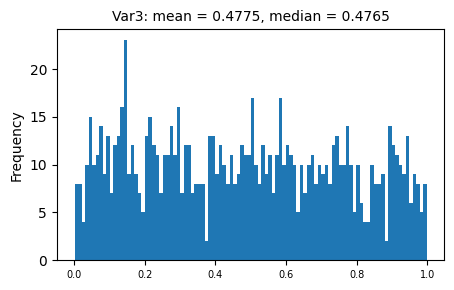

In [303]:
mean_value = df['Var3'].mean()
median_value = df['Var3'].median()

plt.figure(figsize=(5,3))
df['Var3'].plot.hist(bins=100)
plt.title('Var3: mean = {:.4f}, median = {:.4f}'.format(mean_value, median_value), size=10)
plt.show()

Есть особый тип графиков - *boxplot*, который позволяет наглядно увидеть основные перцентили распределения. Построим такие графики для всех колонок из *df*. 

Средняя линия показывает медиану (50-й перцентиль), верхняя и нижняя границы прямоугольника - 25-й и 75-й перцентиль, верхний и нижний диапазоны - минимальное и максимальное значения соответственно.

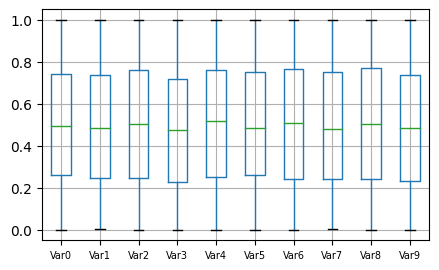

In [304]:
plt.figure(figsize=(5,3))
df.boxplot(column = list(df.columns))
plt.show()

Модуль **matplotlib** позволяет также построить двумерный график двумерной таблицы с помощью функции **matshow()**, при этом значения в таблице будут задавать цвет на двумерном графике. Например, рассчитаем попарную корреляцию Пирсона для всех колонок *df.corr()* и построим двумерный график. 

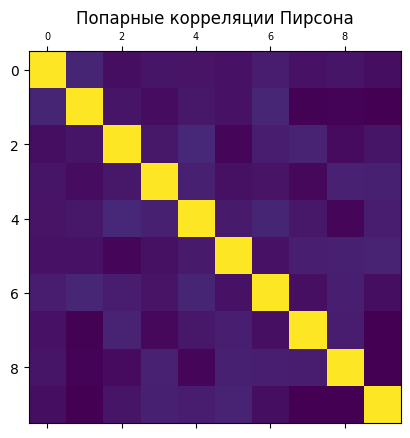

In [305]:
plt.matshow(df.corr())
plt.title('Попарные корреляции Пирсона')
plt.show()

## Задания для самостоятельной работы

1. Постройте на одном графике 4 зависимости: кубическую параболу, корень квадратный, логарифм и сигмоиду. Оформите график таким образом, чтобы разные зависимости визуально четко отличались друг от друга (изменяйте цвет, толщину линии, масштаб графика). Подпишите оси, добавьте легенду.

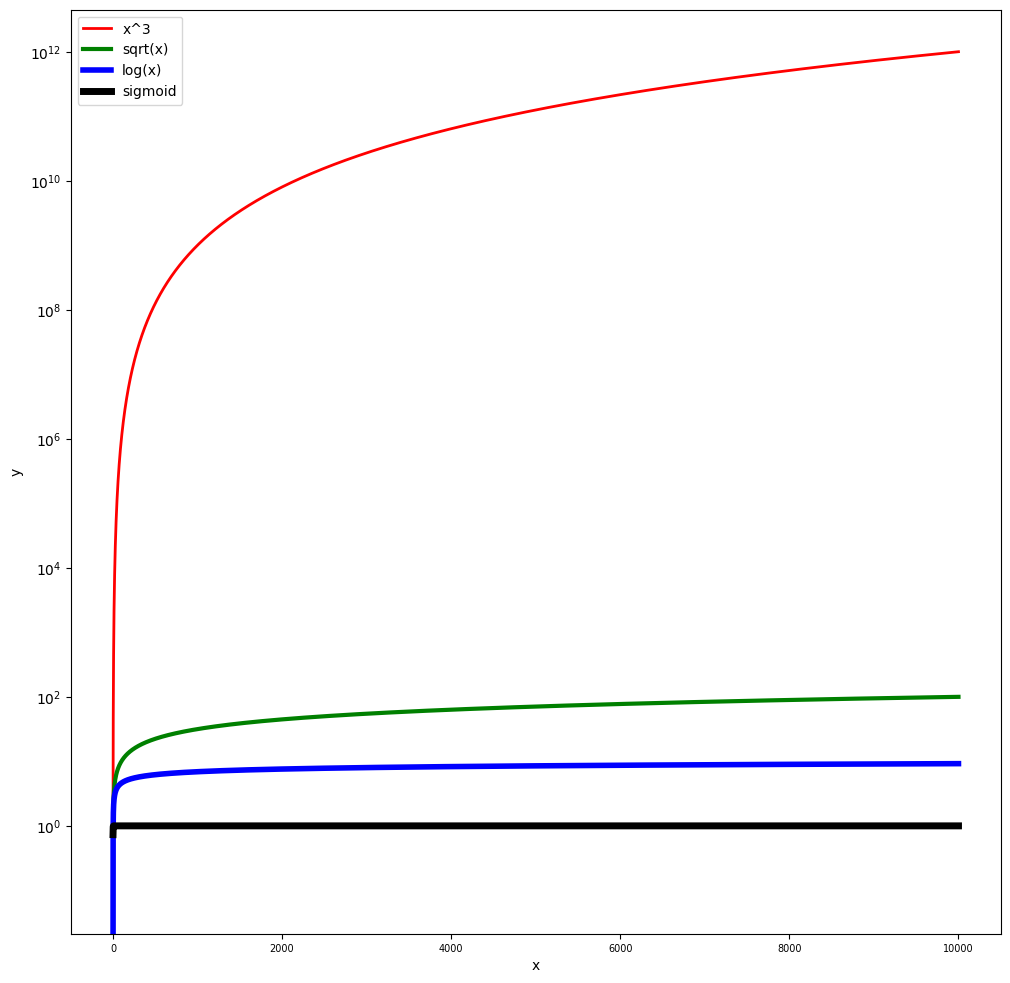

In [306]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))
plt.yscale('log')

x = np.arange(1, 10000, 0.1)

# Plot cubic parabola y = x^3
plt.plot(x, x**3, color='red', linewidth=2, label='x^3')

# Plot square root
plt.plot(x, np.sqrt(x), color='green', linewidth=3, label='sqrt(x)')

# Plot logarithm
plt.plot(x, np.log(x), color='blue', linewidth=4, label='log(x)')

# Plot sigmoid
plt.plot(x, 1/(1+np.exp(-x)), color='black', linewidth=5, label='sigmoid')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

2. Создайте таблицу, состоящую из 50 колонок и 1000 строк. Каждая колонка должна иметь нормальное распределение с различными средними значениями и стандартными отклонениями.

In [307]:
# напишите здесь ваш код

# Create dataframe with 1000 rows
df = pd.DataFrame(index=range(1000))

# Add 50 normally distributed columns
for i in range(50):
    mean = i
    std = i + 1
    col_name = 'col_{}'.format(i)
    df[col_name] = np.random.normal(mean, std, 1000)

df.loc[0:1000].describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.018327,0.971798,1.906293,3.049107,4.104914,4.671915,6.159526,6.795256,7.399541,8.947588,...,39.462018,43.674141,42.148126,42.395996,45.590787,41.055779,46.281414,44.620560,49.470576,49.433207
std,0.986609,2.028132,2.957189,4.095939,4.999648,5.976665,6.867068,7.826307,9.049154,9.881397,...,41.158534,40.636296,43.006496,43.845872,43.945534,47.425701,47.857199,48.551245,49.310581,49.709528
min,-2.872165,-6.704141,-7.812411,-10.678245,-21.115557,-14.723743,-17.141364,-20.564069,-22.922559,-21.459654,...,-114.349449,-89.924777,-100.277153,-104.523668,-103.868198,-106.863447,-88.519393,-101.286517,-118.147313,-129.063913
25%,-0.692946,-0.339152,-0.195589,0.282591,0.883466,0.625650,1.334783,1.470769,1.188320,2.163430,...,12.694254,14.705884,13.231154,13.017355,15.127290,7.397927,14.248379,9.669977,16.903191,14.961480
50%,-0.012828,1.033417,1.787853,3.137723,4.265366,4.320596,6.317276,6.797223,7.674238,9.449721,...,41.940969,42.965256,41.410220,40.782727,44.911672,42.032752,46.636560,46.042876,49.893268,48.147980
75%,0.622247,2.297582,3.946504,5.819581,7.338601,8.434666,11.080679,12.113520,13.366720,15.672126,...,65.817915,71.325200,71.276539,70.097165,77.633932,73.958475,79.645335,77.258859,81.330843,81.094609
max,3.119127,8.422053,11.679527,16.470950,20.404304,23.263990,25.307119,32.183924,34.188499,39.906481,...,179.246264,177.298845,171.765249,167.761714,199.633313,176.922832,192.140275,188.371541,216.455642,228.636277


3. Определите медианы и стандартные отклонения для всех колонок.

In [308]:
# напишите здесь ваш код
result = None

columns = df.columns
indices = ['std', 'median']
result = pd.DataFrame(np.empty(shape=(len(indices), len(columns))), columns=columns, index=indices)

part = df.loc[:, columns]
result.loc['std'] = part.apply(np.std, axis=0)
result.loc['median'] = part.apply(np.median, axis=0)

result


,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_40,col_41,col_42,col_43,col_44,col_45,col_46,col_47,col_48,col_49
std,0.986116,2.027118,2.955710,4.093891,4.997147,5.973676,6.863633,7.822393,9.044628,9.876455,...,41.137949,40.615973,42.984987,43.823943,43.923556,47.401983,47.833265,48.526963,49.285920,49.684667
median,-0.012828,1.033417,1.787853,3.137723,4.265366,4.320596,6.317276,6.797223,7.674238,9.449721,...,41.940969,42.965256,41.410220,40.782727,44.911672,42.032752,46.636560,46.042876,49.893268,48.147980


4. Постройте 2 отдельных точечных графика в одном окне: один для медиан, второй для стандартных отклонений. Оформите график так, чтобы он выглядел аккуратно и красиво (выберите подходящий масштаб, размер шрифта, подпишите оси, добавьте названия графиков).

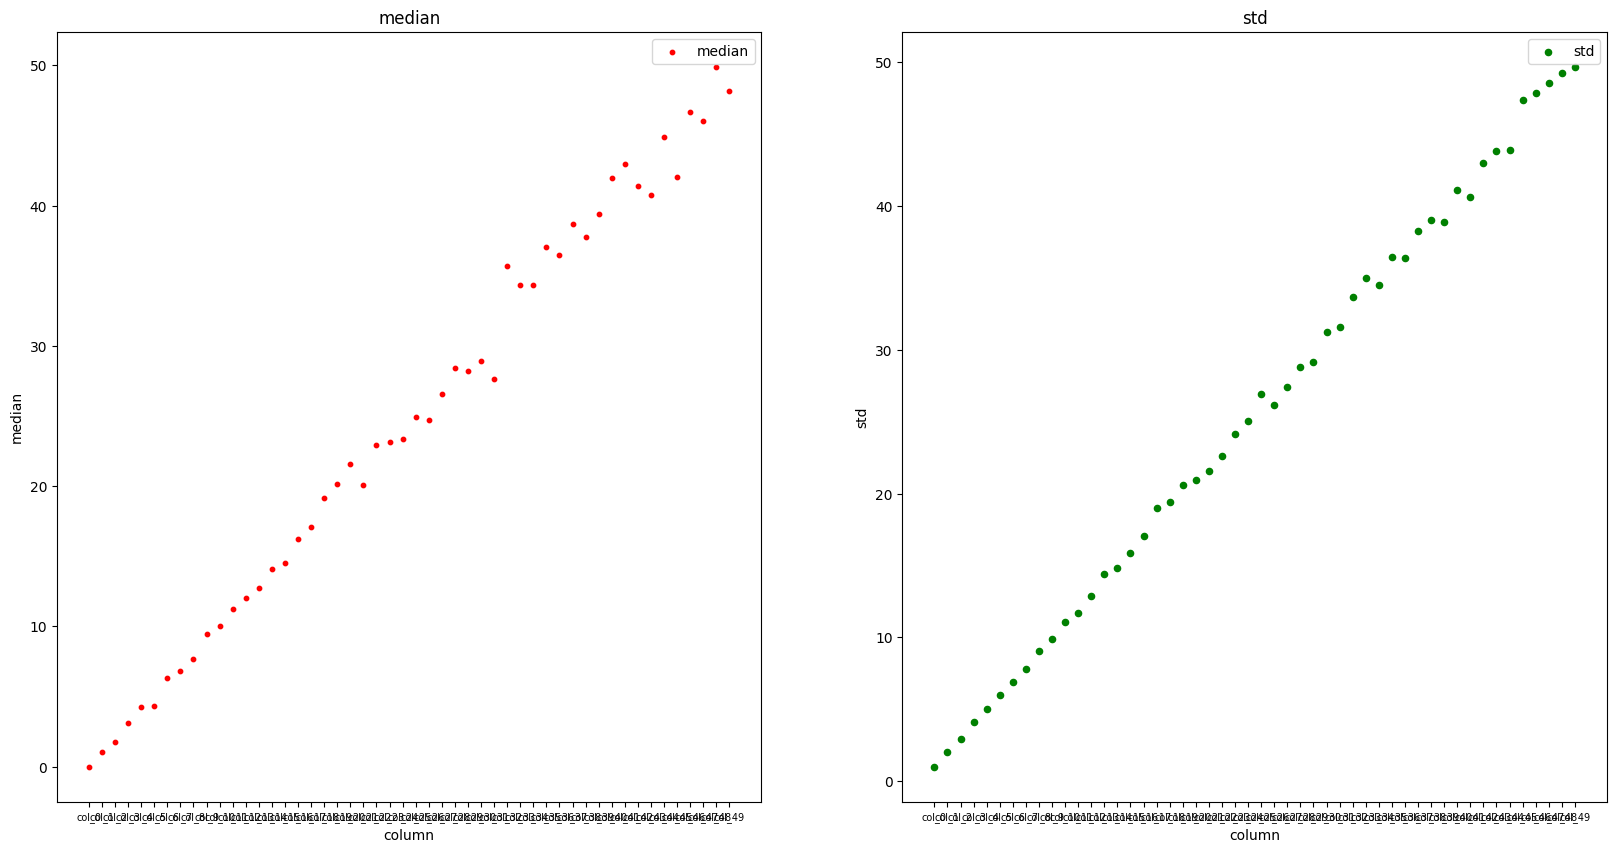

In [309]:
# напишите здесь ваш код
import matplotlib

matplotlib.rc('xtick', labelsize=7)

plt.figure(figsize = (20,10))

plt.subplot(1,2,1)

plt.scatter(result.columns, result.loc['median'], color='red', s=10, label='median')

plt.title('median')
plt.xlabel('column')
plt.ylabel('median')
plt.legend()

plt.subplot(1,2,2)

plt.scatter(result.columns, result.loc['std'], color='green', s=20, label='std')

plt.title('std')
plt.xlabel('column')
plt.ylabel('std')
plt.legend()

plt.show()

5. Постройте boxplot для любых 10 колонок.

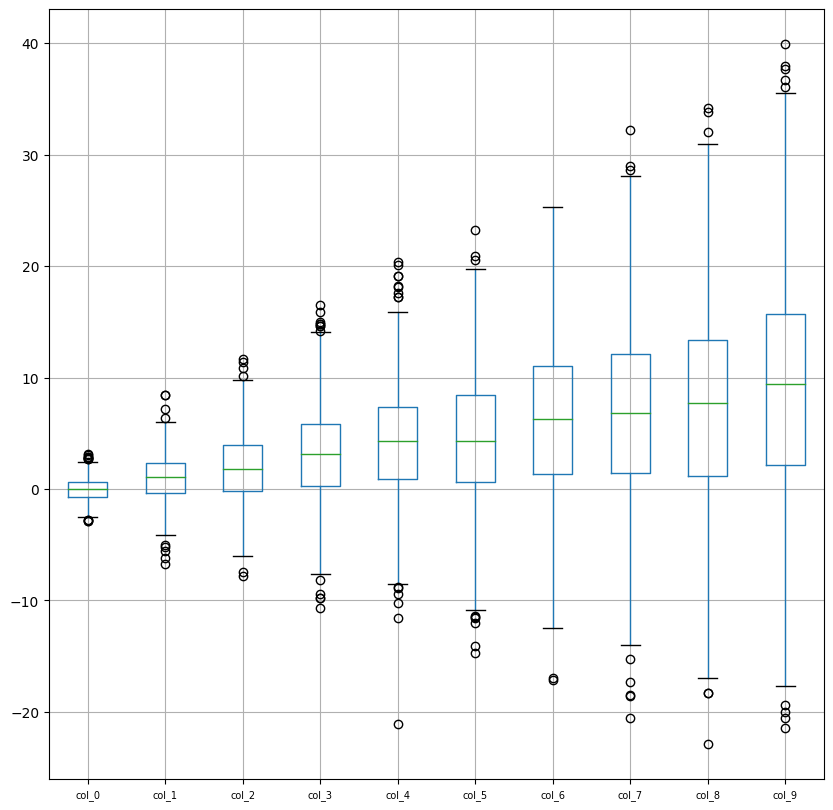

In [310]:
# напишите здесь ваш код
plt.figure(figsize=(10,10))
df.boxplot(column = list(df.columns[0:10]))
plt.show()

6. Создайте другую таблицу, состоящую из 1000 колонок и 1000 строк. Каждая колонка должна иметь равномерное распределение в интервале от 0 до 1.

In [311]:
# напишите здесь ваш код

# Создаем таблицу с 1000 колонками и 1000 строками
data = np.random.uniform(0, 1, size=(1000, 1000))

# Преобразуем массив данных в DataFrame с помощью pandas
df = pd.DataFrame(data)

df.describe()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.512894,0.512576,0.499536,0.506064,0.502929,0.507831,0.512798,0.503942,0.494951,0.512746,...,0.504877,0.483309,0.505030,0.496263,0.499519,0.505726,0.502233,0.501828,0.493316,0.508666
std,0.287880,0.291550,0.287603,0.287328,0.286799,0.281991,0.281840,0.291235,0.289314,0.284607,...,0.288788,0.293292,0.288301,0.284407,0.289339,0.283478,0.283988,0.294453,0.291835,0.290784
min,0.000317,0.001398,0.000778,0.000170,0.000274,0.000162,0.000393,0.000891,0.000380,0.001409,...,0.000370,0.000071,0.000125,0.000978,0.000093,0.001054,0.002605,0.000830,0.000934,0.000853
25%,0.265972,0.251260,0.255136,0.256860,0.250238,0.271494,0.267779,0.257771,0.254130,0.267685,...,0.256291,0.219822,0.252428,0.253773,0.255353,0.262198,0.257222,0.237608,0.234916,0.255251
50%,0.509513,0.528014,0.494748,0.511356,0.507341,0.511472,0.511790,0.491459,0.492799,0.538385,...,0.510524,0.482782,0.517852,0.492991,0.497318,0.510367,0.495853,0.494743,0.483225,0.511183
75%,0.762330,0.766868,0.752175,0.763857,0.757836,0.741668,0.758315,0.758494,0.751567,0.747852,...,0.747645,0.733819,0.758007,0.734354,0.747724,0.734336,0.755391,0.764077,0.749151,0.764355
max,0.998562,0.998734,0.999013,0.999706,0.999361,0.999046,0.998809,0.999732,0.997917,0.999888,...,0.999842,0.998010,0.998548,0.997481,0.999767,0.999841,0.998863,0.998049,0.999089,0.999607


7. Рассчитайте попарную корреляцию Пирсона всех колонок. Определите 4 пары колонок, имеющих наибольшую попарную корреляцию.

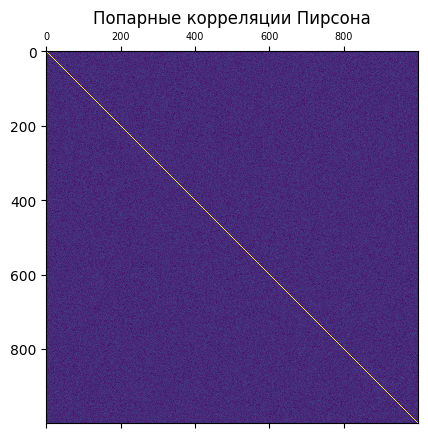

In [312]:
corr = df.corr()
plt.matshow(corr)
plt.title('Попарные корреляции Пирсона')
plt.show()

# continuous below

In [313]:
corr_no_lower_tri = corr

corr_no_lower_tri.values[np.tril_indices_from(corr_no_lower_tri.values)] = 0

corr_no_lower_tri

# continuous below

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.0,-0.060719,0.042674,0.010506,0.005202,0.047950,0.020412,-0.024335,0.041864,0.019739,...,-0.021610,0.037928,0.033141,0.029035,0.031949,0.044770,-0.001435,-0.021035,0.030336,0.021229
1,0.0,0.000000,-0.014570,0.003903,0.033574,-0.026265,-0.029707,-0.033873,-0.005002,0.017507,...,-0.038135,-0.022862,0.027030,-0.029769,-0.042360,-0.014536,-0.103384,-0.001005,0.024740,-0.027011
2,0.0,0.000000,0.000000,-0.024649,0.057530,-0.051562,0.018417,-0.029834,0.005606,0.007769,...,0.007781,-0.067508,0.032163,-0.033910,0.012679,-0.021693,-0.042595,0.011149,-0.006780,0.012650
3,0.0,0.000000,0.000000,0.000000,-0.069539,0.054196,0.008075,0.035756,0.018334,-0.012272,...,0.026097,-0.000850,0.039954,-0.002858,-0.033379,0.022237,0.014701,-0.015659,0.014425,-0.018577
4,0.0,0.000000,0.000000,0.000000,0.000000,-0.013602,-0.005787,-0.000162,0.019128,0.030097,...,-0.035089,-0.021370,0.013055,-0.017585,0.020523,0.022115,-0.016111,-0.040378,0.021564,-0.003690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006103,0.009115,-0.016907,-0.004953
996,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035075,0.030922,-0.006485
997,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007926,-0.000488
998,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.026125


In [314]:
maximums = corr_no_lower_tri.abs().idxmax().items()

from collections import namedtuple

Corr = namedtuple("Corr", ["col1", "col2", "corr"])

corr = []

for maximum_idx, corr_value in zip(maximums, corr_no_lower_tri.abs().max().values):
  corr.append(Corr(col1=maximum_idx[0], col2=maximum_idx[1], corr=corr_value))

corr4 = sorted(corr, reverse=True, key=lambda x: x.corr)[0:4]
corr4

[Corr(col1=632, col2=63, corr=0.13727764205583934),
 Corr(col1=961, col2=398, corr=0.13558607264484884),
 Corr(col1=208, col2=151, corr=0.13385883278320163),
 Corr(col1=429, col2=150, corr=0.1331799944526007)]

8. Постройте линейные графики этих пар в одном окне, так чтобы на каждом графике отображалась одна пара (каждая кривая своим цветом).

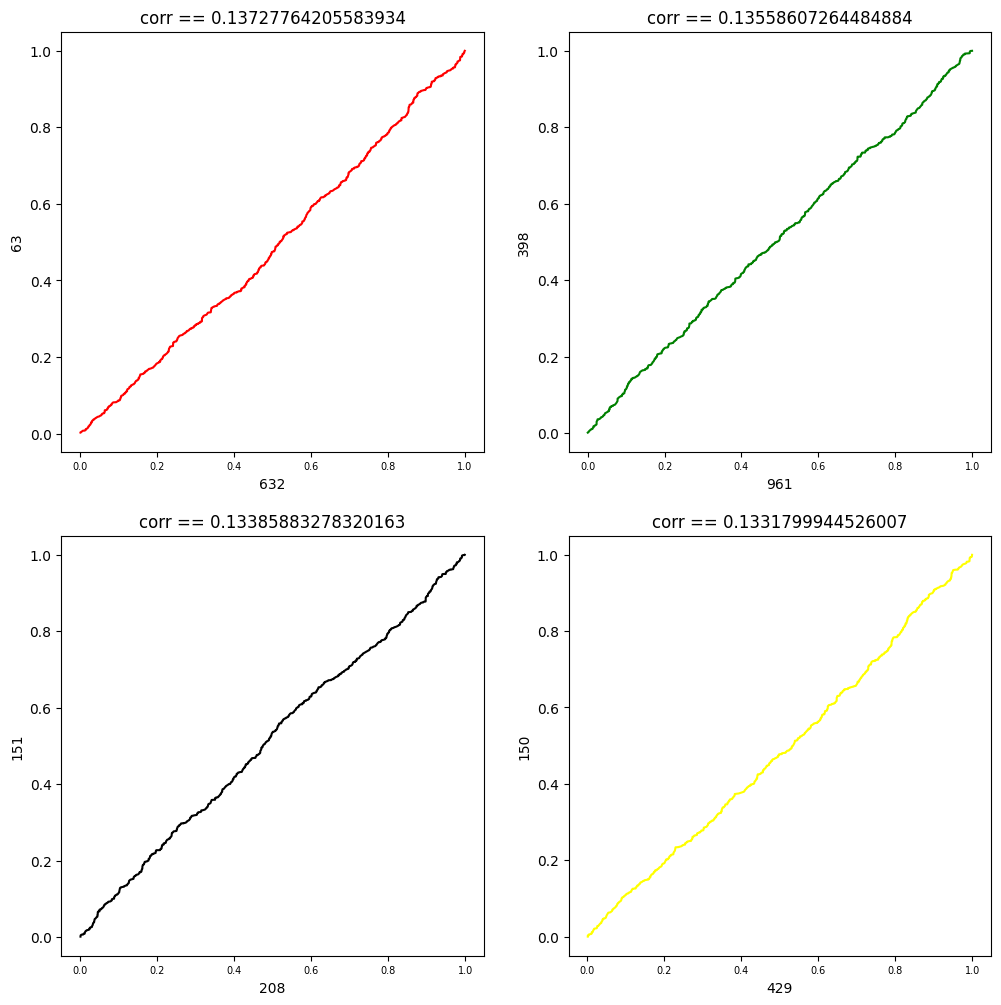

In [315]:
# напишите здесь ваш код
plt.figure(figsize = (12,12))

plt.subplot(2,2,1)

def plot(corr_item: Corr, color: str):
  plt.plot(sorted(df[corr_item.col1]), sorted(df[corr_item.col2]), color=color)

  plt.title(f'corr == {corr_item.corr}')
  plt.xlabel(corr_item.col1)
  plt.ylabel(corr_item.col2)

plot(corr4[0], 'red')

plt.subplot(2,2,2)
plot(corr4[1], 'green')

plt.subplot(2,2,3)
plot(corr4[2], 'black')

plt.subplot(2,2,4)
plot(corr4[3], 'yellow')

plt.show()

9.  Сделайте вывод о скоррелированности этих случайных величин.

    В соответствии с лекции
    |$r_{xy}$| < 0.19 - очень слабая корреляция

## Список литературы

- Модуль **pandas** [https://pandas.pydata.org/docs/](https://pandas.pydata.org/docs/ "pandas")
- Модуль **matplotlib** [https://matplotlib.org/stable/api/pyplot_summary.html](https://matplotlib.org/stable/api/pyplot_summary.html "matplotlib")